# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [3]:
dados = pd.read_csv('Dados/aluguel_residencial.csv', sep = ';')

<img src="box-plot.png">

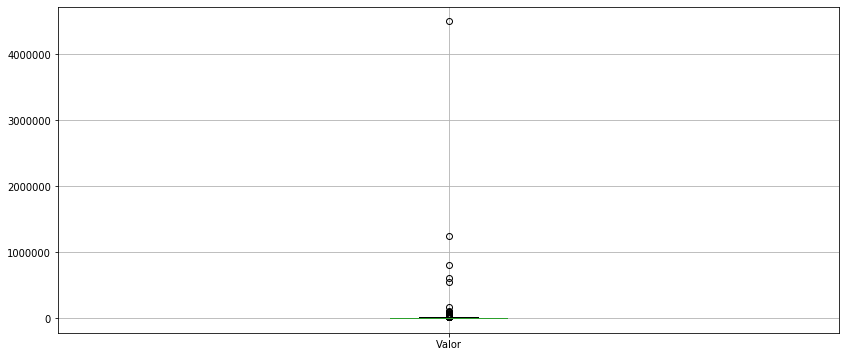

In [4]:
dados.boxplot(['Valor'])

In [6]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7888,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11004,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
13090,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14316,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16047,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [7]:
valor = dados['Valor']

In [12]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
# definindo quartil e outliers

In [14]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]
# fazendo seleção dos outliers

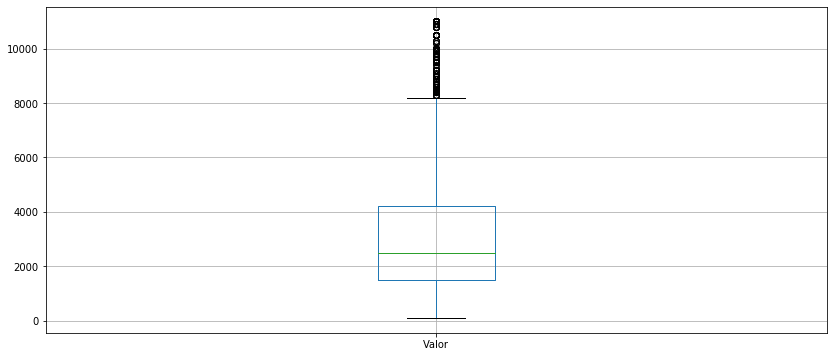

In [15]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f188df48ba8>]],
      dtype=object)

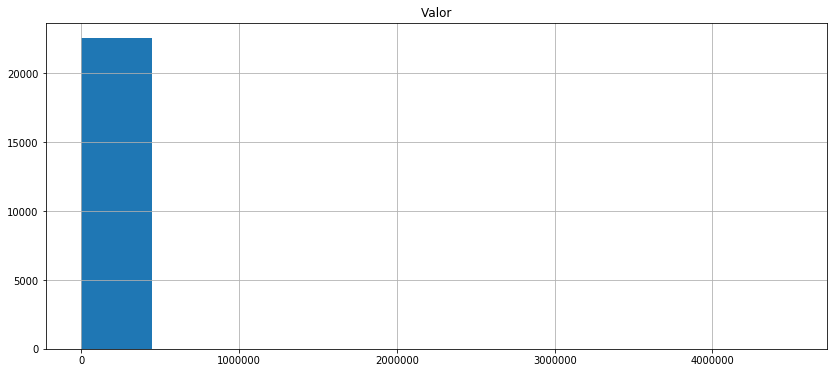

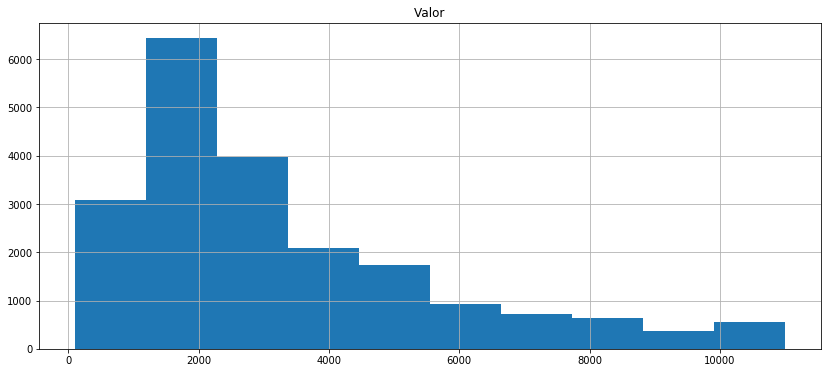

In [16]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (Continuação)

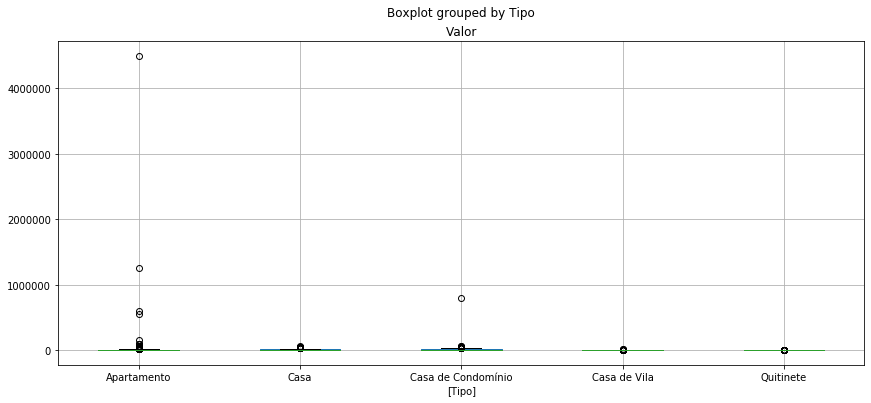

In [17]:
dados.boxplot(['Valor'], by = ['Tipo'])
# fazendo o boxplot dos valores separados por Tipo

In [18]:
grupo_tipo = dados.groupby('Tipo')['Valor']
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     5,     8,     9,    10,    11,    13,
                15,
             ...
             22558, 22559, 22561, 22562, 22563, 22564, 22566, 22568, 22569,
             22570],
            dtype='int64', length=19525),
 'Casa': Int64Index([    1,    24,    56,    59,    99,   103,   149,   165,   187,
               247,
             ...
             22323, 22348, 22356, 22411, 22416, 22443, 22501, 22526, 22538,
             22549],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    6,     7,    14,    18,    44,    60,   171,   173,   190,
               216,
             ...
             22453, 22455, 22463, 22497, 22508, 22509, 22527, 22536, 22546,
             22565],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   84,   221,   229,   313,   342,   717,   845,   867,   942,
              1041,
             ...
             21913, 21918, 21982, 22058, 22087, 22100, 22329, 22378, 22460

In [19]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [22]:
dados_new = pd.DataFrame() # zerando dados_new, DataFrame vazio
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo # separando dados dos tipos
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo]) #dados nos limites
    selecao = eh_tipo & eh_dentro_limite # seleção dos dados pertencentes ao tipos e dentro dos limites
    dados_selecao = dados[selecao] # DataFrame da seleção
    dados_new = pd.concat([dados_new, dados_selecao]) # concatenando dados da seleção com DataFrame dados_new
    

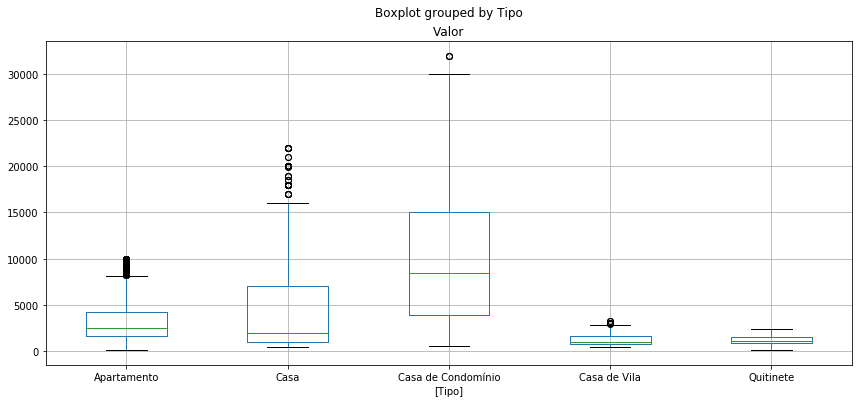

In [23]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [24]:
dados_new.to_csv('Dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)